<a href="https://colab.research.google.com/github/sobikaM/VRP3/blob/main/Vehicle_routing_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10
locations =[(random.uniform(0, 100), random.uniform(0, 100)) for i in range(num_locations)]
depot = (50,50)
num_vehicles = 3


In [ ]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0 ))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [ ]:
import numpy as np
import math

In [ ]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
toolbox.register("evaluate",evalVRP)


In [ ]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate",tools.cxPartialyMatched )
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

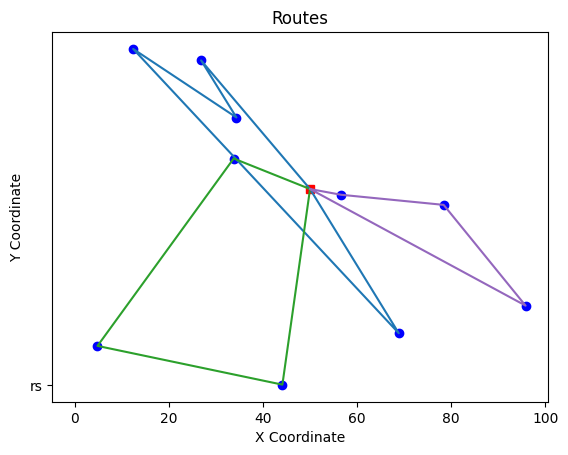

In [ ]:

def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
plot_routes([0,1,2,3,4,5,6,7,8,9])

gen	nevals	avg    	min  
0  	300   	326.984	1.078
1  	226   	319.156	3.68499
2  	240   	313.621	3.89239
3  	226   	310.501	1.53831
4  	239   	307.485	1.73233
5  	226   	300.902	2.07879
6  	240   	300.356	1.20249
7  	247   	301.053	1.3174 
8  	236   	297.488	1.3174 
9  	243   	297.928	1.3174 
10 	239   	297.363	1.37766
11 	230   	291.802	1.37766
12 	248   	296.77 	0.832228
13 	222   	294.358	0.832228
14 	243   	292.107	0.832228
15 	243   	291.232	0.832228
16 	239   	289.512	4.70606 
17 	219   	284.343	4.87046 
18 	219   	279.998	5.15574 
19 	225   	274.474	3.53184 
20 	256   	276.794	0.832228
21 	232   	272.337	3.11138 
22 	214   	261.977	5.53079 
23 	237   	256.478	4.54344 
24 	233   	250.561	6.88147 
25 	236   	237.328	1.3174  
26 	221   	233.06 	2.64438 
27 	239   	231.376	5.91116 
28 	222   	226.464	10.1373 
29 	244   	227.103	5.91116 
30 	242   	228.211	1.23496 
31 	232   	223.248	0.98351 
32 	223   	224.64 	5.62967 
33 	224   	225.198	4.41747 
34 	229   	224.561	1.97339 
35 	236  

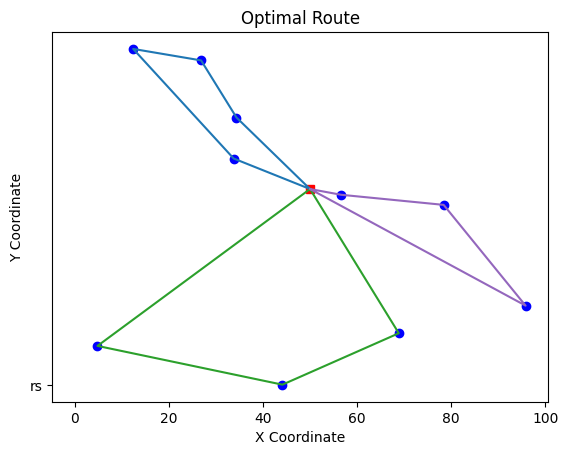

In [ ]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()